### Recursion and Fractals
<img src="img/recursion.jpg" style="max-height: 230px" />

> "To understand recursion, you first need to understand recursion."

There are three main parts to a recursive function:
1. Bottom - when the recursion should finish
2. Operation - some meaningful thing to do
3. Recursive call - calling the same function
4. Clean-up - returning all data to its previous state (this reverses the effect of the operation)

Let's do one of the most famous recursion examples. The most trivial function to recreate is the **factorial**. Derive (or look up) a recurrent definition of the factorial of a non-negative integer and implement it.

**There is a one-to-one correspondence between loops and recursion.** Use this correspondence to create an iterative definition (one which uses loops) and compare both. Test that they return the same results.

**Note:** Think how Python handles very large integers.

In [18]:
def factorial_recursive(n: int) -> int:
    """
    Computes the factorial of a non-negative number n (using recursion)
    """
    return n * factorial_recursive(n-1) if n > 1 else 1

def factorial_iterative(n: int) -> int:
    """
    Computes the factorial of a non-negative number n (using iteration)
    """
    factorial = [1]
    [factorial.append(factorial[-1] * i) for i in range(2, n+1)]
    return factorial[-1]

print(f"0! = {factorial_iterative(0)}")
print(f"0! = {factorial_recursive(0)}")

print(f"1! = {factorial_iterative(1)}")
print(f"1! = {factorial_recursive(1)}")

print(f"4! = {factorial_iterative(4)}")
print(f"4! = {factorial_recursive(4)}")

# Python's integer type can handle integers with some million digits without information loss. It accomplishes this by 
# using "arbitrary-precision arithmetic". Arbitrary-precision arithmetic uses variable-length arrays of digits to represent 
# numbers, allowing for precision that is limited only by the system’s available memory rather than a fixed number of bits. 
print(f"100! = {factorial_iterative(100)}")
print(f"100! = {factorial_recursive(100)}")

0! = 1
0! = 1
1! = 1
1! = 1
4! = 24
4! = 24
100! = 93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000
100! = 93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000


#### Endless sequences
A very famous recursive definition gives us natural numbers (by (the Peano axioms)[https://en.wikipedia.org/wiki/Peano_axioms]). How can we recreate this using Python? Obviously, we cannot put an infinite sequence in a list. However, we can do something else: define the entire sequence and take only parts of it.

Devise a way to define all natural numbers, using the function signature below. Use this to define a smaller, but just as infinite, sequence of even numbers. **Hint:** If you're very stuck, think about the problem hard and it will finally _yield_ to your efforts.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys                     # Required for the Mandelbrot set

from typing import Generatorx

ImportError: cannot import name 'Generator' from 'typing' (c:\Users\mdzho\AppData\Local\Programs\Python\Python313\Lib\typing.py)

In [8]:
def nat() -> Generator[int, None, None]:
    """Returns a Generator that produces all natural numbers."""
    i = 0
    while True:
        yield i
        i += 1 # Every natural number, starting from zero.

def even() -> Generator[int, None, None]:
    """Returns a Generator that produces all even numbers."""
    i = 0
    while True:
        yield i
        i += 2 # Only even numbers, starting from zero.

In [9]:
natural_numbers = nat()
print(natural_numbers)
print(f'Natural numbers: {[next(natural_numbers) for _ in range(20)]}')

even_numbers = even()
print(f'Even numbers:    {[next(even_numbers) for _ in range(19)]}')

<generator object nat at 0x00000208A97BB4C0>
Natural numbers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Even numbers:    [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36]


Use the approach above to rewrite the factorial function in a "lazy" way.

In [10]:
def factorial_new(n: int) -> Generator[int, None, None]:    
    """Returns a Generator that produces all factorial products up to `n`."""
    product = 1
    for i in range(1, n+1): # range() does not include the end value
        product *= i        # Multiply all numbers in the sequence.
        yield product
        i += 1

In [11]:
fact_generator = factorial_new(12)
n = 0
while True:
    try:
        n += 1
        print(f"{n}! = {next(fact_generator)}")
    except:
        print('Factorial generator was depleted!')
        break

1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
8! = 40320
9! = 362880
10! = 3628800
11! = 39916800
12! = 479001600
Factorial generator was depleted!


Use **the same approach** to return the Fibonacci sequence - another famous one in mathematics. Given `n`, produce all Fibonacci numbers from $F_1$ up to $F_n$, inclusive.

In [12]:
def fibonacci(n: int) -> Generator[int, None, None]:    
    """Returns a Generator that produces all Fibonacci products up to `n`."""
    fib1 = 0
    fib2 = 1    
    for _ in range(2, n+2): # we start from second item and range() does not include the end value 
        yield fib1
        fib1, fib2 = fib2, fib2 + fib1  # Bump up `fib2` with `fib1`. Old `fib2` becomes the new `fib1`.

In [13]:
fibo_generator = fibonacci(10)
n = 0
while True:
    try:
        n += 1
        print(f"#{n} in the fibo seq => {next(fibo_generator)}")
    except:
        print('Fibonacci generator was depleted!')
        break

#1 in the fibo seq => 0
#2 in the fibo seq => 1
#3 in the fibo seq => 1
#4 in the fibo seq => 2
#5 in the fibo seq => 3
#6 in the fibo seq => 5
#7 in the fibo seq => 8
#8 in the fibo seq => 13
#9 in the fibo seq => 21
#10 in the fibo seq => 34
Fibonacci generator was depleted!


#### The Mandelbrot set
Now, let's get to something more beefy. The Mandelbrot set is defined by repeatedly squaring complex numbers. It turns out that it produces a **fractal** - a self-similar structure. Follow a tutorial to create (and possibly visualize) the Mandelbrot set. I think [this one](https://medium.com/swlh/visualizing-the-mandelbrot-set-using-python-50-lines-f6aa5a05cf0f) is a good starting point.

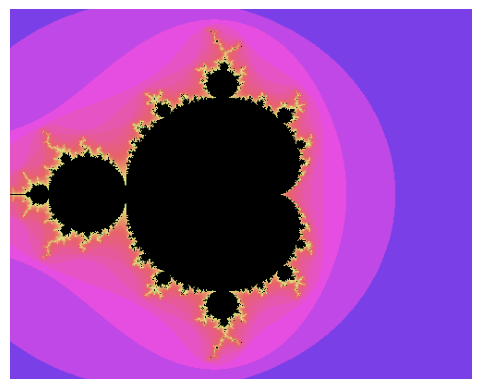

In [20]:
# A coloring algorithm, based on the power function.
def powerColor(distance: float, exp: float, const: float, scale: float) -> tuple:
    """
    Returns a triplet with 3 RGB integers (0-255, 0-255, 0-255)
    """
    color = distance**exp
    rgb = colorsys.hsv_to_rgb(const + scale * color, 1 - 0.6 * color, 0.9)
    return tuple(round(i * 255) for i in rgb)

# Define the frame for the image
width = 500 #pixels
height = 400
xZoomOut = 3      # Zoom out param
yZoomOut = 2.5    # Zoom out param
precision = 50

# Pre-calculate the offset (which is needed in order to place the fractal in the center of the plot)
minX = -xZoomOut / 2
maxY = yZoomOut / 2

# Create black image
pixels = np.zeros((height, width, 3), dtype=int)

# loop through the image’s pixels, and map each pixel to a cartesian point (x, y).
for row in range(height):
    for col in range(width):
        x = minX + col * xZoomOut / width
        y = maxY - row * yZoomOut / height
        oldX = x
        oldY = y

        # Iterate through the Mandelbrot Set’s core function, waiting for when the distance to become greater than 2.
        for i in range(precision + 1):
            # Square the number.
            a = x*x - y*y   # real component of z^2
            b = 2 * x * y   # imaginary part of z^2
            x = a + oldX    # real component of new z
            y = b + oldY    # imaginary part of new z
            # Once the distance from the center becomes greater than 2, then stop calculation. The function diverges.
            if x*x + y*y > 4:
                break

        # If a point diverges, the corresponding pixel’s color will depend on how many iterations were conducted.
        if i < precision:
            distance = (i + 1) / (precision + 1)
            rgb = powerColor(distance, 0.2, 0.27, 1.0)
            pixels[row][col] = rgb

        index = row * width + col + 1

plt.axis("off")
plt.imshow(pixels)
plt.show()